# Análise dos dados da Copa do mundo do público pagante
link: https://pt.wikipedia.org/wiki/Copa_do_Mundo_FIFA

In [1]:
import pandas as pd
import requests
url = 'https://pt.wikipedia.org/wiki/Copa_do_Mundo_FIFA'

In [6]:
dados = requests.get(url)

In [8]:
# Obter os dados em formato HTML
table = pd.read_html(dados.text)

In [9]:
table

[                                   Copa do Mundo FIFA  \
 0                                                 NaN   
 1                                        Dados gerais   
 2                                         Organização   
 3                                             Edições   
 4                                    Local de disputa   
 5                                             Sistema   
 6   Dados históricos  Primeiro vencedor Uruguai (1...   
 7                                    Dados históricos   
 8                                   Primeiro vencedor   
 9                                     Último vencedor   
 10                                     Maior vencedor   
 11  Estatísticas  Total de gol(o)s 2 548  Total de...   
 12                                       Estatísticas   
 13                                   Total de gol(o)s   
 14                                     Total de jogos   
 15                                              Média   
 16           

In [10]:
# Queremos apenas a tabela com os pagantes por final
# Essa é a 12 tabela dos dados retornados
# Então o dataframe será apenas a tabela 12

df = table[11]
df.head()

,Edição,Ano,Estádio,Local,Público pagante
0,I,1930,Estádio Centenário,Montevidéu,68.346
1,II,1934,Estádio do Partido Nacional Fascista,Roma,55.000
2,III,1938,Estádio Olímpico Yves-du-Manoir,Colombes,45.000
3,IV,1950,Estádio do Maracanã,Rio de Janeiro,173.850
4,V,1954,Estádio Wankdorf,Berna,62.500


In [14]:
# Deletar uma linha do datafrme
# df.drop(df.index[0], inplace=True)

2

In [18]:
# Vamos os tipos das colunas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Edição           21 non-null     object 
 1   Ano              21 non-null     int64  
 2   Estádio          21 non-null     object 
 3   Local            21 non-null     object 
 4   Público pagante  21 non-null     float64
dtypes: float64(1), int64(1), object(3)
memory usage: 968.0+ bytes


In [19]:
df['Público pagante'] = pd.to_numeric(df['Público pagante'])

In [22]:
df.dtypes

Edição              object
Ano                  int64
Estádio             object
Local               object
Público pagante    float64
dtype: object

In [24]:
df['Público pagante'] = df['Público pagante'].astype(str)
# Converter tipo para inteiro
# df['Público pagante'] = df['Público pagante'].str.replace('.', '').astype(int)

In [27]:
df.dtypes

Edição             object
Ano                 int64
Estádio            object
Local              object
Público pagante     int32
dtype: object

In [26]:
df['Público pagante'] = df['Público pagante'].str.replace('.', '').astype(int)

C:\Users\barba\AppData\Local\Temp/ipykernel_16572/910384048.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Público pagante'] = df['Público pagante'].str.replace('.', '').astype(int)


In [28]:
# Construir um gráfico com a evolução do público pagante

import seaborn as sns
import matplotlib.pyplot as plt

In [29]:
%matplotlib inline

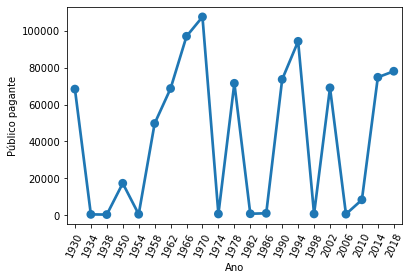

In [31]:
# Exibir o gráfico de linhas com marcação em cada ponto
sns.pointplot(x='Ano', y='Público pagante', data=df)

# Ajustar as legendas
plt.xticks(rotation=65)
plt.show()